<a class="anchor" id="0.1"></a>
# **Table of Contents** 

1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#7)
8. [References](8)

# **Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Time series modeling is a powerful tool used in various industries to predict and forecast temporal variables. In the small-scale pharmaceutical arena, where sales of drugs and related products are of great importance, the use of time series modeling techniques can provide valuable insight for inventory planning and management, as well as making strategic decisions.

Accurate forecasting of small-scale pharmaceutical sales is critical to ensuring an adequate supply of medications and minimizing costs associated with excess or out-of-stock inventory. Furthermore, seasonal factors and trends specific to the pharmaceutical industry can significantly affect sales, making time series modeling an especially relevant tool in this context.

By applying time series modeling techniques, historical patterns and behaviors in pharmaceutical sales can be identified. These patterns may include monthly seasonality or seasonality related to specific events, such as flu seasons, seasonal changes in demand for certain products, or holidays related to medication consumption.

In addition to seasonality, time series can reveal long-term trends, changes in demand due to external factors such as government regulations or medical advances, as well as patterns of random variation that can be difficult to capture with other forecasting approaches.

In this sense, the objective of this study is to apply time series modeling techniques to predict sales of small-scale pharmaceutical products. By taking advantage of historical sales data and using methods such as exponential smoothing, ARIMA (Autoregressive Integrated Moving Average) models or other more sophisticated approaches, we seek to obtain accurate and reliable forecasts that help optimize inventory management and strategic decision making in the small-scale pharmaceutical industry.

The result of this study has the potential to benefit pharmaceutical companies by providing them with a solid foundation to plan and manage their operations more efficiently. By anticipating future demands and quickly adapting to changes in the market, these companies can optimize their resources and maximize their profitability, while ensuring an adequate supply of medicines to meet the needs of their customers and patients.

# **Case study** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In this mini case study, we will focus on forecasting the demand for a specific drug in the pharmaceutical industry. The main idea is to use time series forecasting models to predict the future demand for that drug. By doing so, we will enable the pharmaceutical company to make informed decisions about drug production, inventory and distribution, thereby optimizing its supply chain and meeting patient needs efficiently.

The main objective of this case study is to forecast the demand for a specific drug based on historical data available from 2014 to 2019, on a daily basis. We will use time series models to predict future demand for the drug, allowing the pharmaceutical company to properly plan production and inventory management.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Forecast of demand for a drug.

In this case study, the pharmaceutical company will have an accurate demand forecasting model for the drug in question. This will allow them to make informed decisions about production, inventory and marketing strategies. Additionally, using time series models will give them a competitive advantage by anticipating fluctuations in demand and quickly adapting to changes in the pharmaceutical market.

## **Load Library**

In [85]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [86]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

## **Load data**

Information about our data:

The data set consisted of 6 years (period 2014-2019). As a result of the interviews with the pharmacists it was decided that the subject of the analyzes and forecasts would be the actual drug categories, rather than the individual drugs. Therefore, the selected group of drugs (57 drugs) is classified into 8 categories of the Anatomical Therapeutic Chemical Classification System (ATC):

* M01AB - Sales volume of anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related.
* M01AE - Sales volume of anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives.
* N02BA - Sales volume of other analgesics and antipyretics, Salicylic acid and derivatives,
* N02BE/B - Sales volume of other analgesics and antipyretics, Pyrazolones and Anilides.
* N05B - Sales volume of psycholeptics drugs, Anxiolytic drugs.
* N05C - Sales volume of psycholeptics drugs, Hypnotics and sedatives drugs
* R03 - Sales volume of drugs for obstructive airway diseases
* R06 - Sales volume of antihistamines for systemic use



In [87]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/pharma_sales_daily.csv", parse_dates=["datum"])#.loc[:, ['datum', 'M01AB']]
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,2014-01-03,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,2014-01-04,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,2014-01-05,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,2014-01-06,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2019-10-04,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,2019-10-05,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,2019-10-06,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,2019-10-07,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df=df.rename(columns={"datum": "ds", "M01AB": "y"})
df.head()

,ds,y,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,unique_id
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday,1
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday,1
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday,1
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday,1
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            2106 non-null   datetime64[ns]
 1   y             2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64       
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         
 12  Weekday Name  2106 non-null   object        
 13  unique_id     2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(2)
memory usage: 230.5+ KB


# **Explore Data with the plot method** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

Graphical visualization of time series can be an effective strategy for detecting trends, patterns, and seasonality. This approach, in turn, makes it easier to identify potential lags that could be used as predictors in the model.

We will use the `plot` method of `Statsforecast` to visualize our data. This method prints 8 random series from the dataset and is useful for basic EDA.

This is what our data looks like, after having performed a couple of maneuvers on our data.

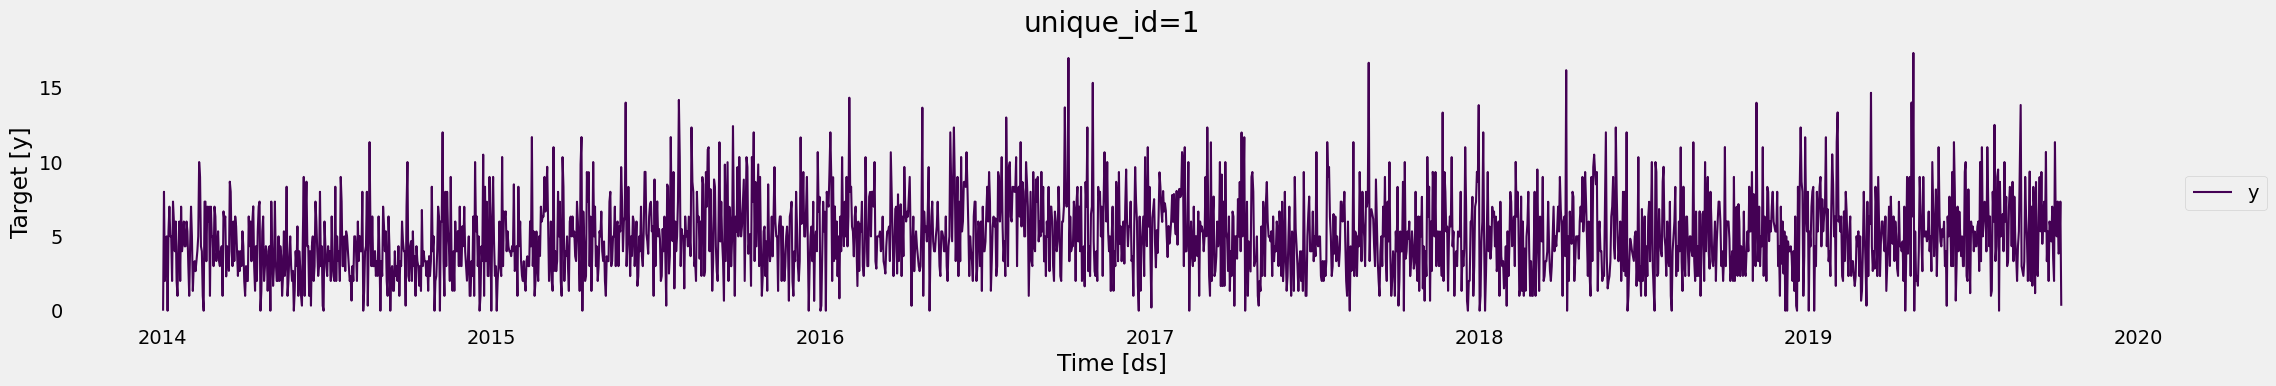

In [6]:
plot_series(df)

In [7]:
df_m01ab = df[['y','Year','Month']]

In [8]:
df_m01ab = df_m01ab.groupby(['Year', 'Month']).sum().reset_index()
df_m01ab

,Year,Month,y
0,2014,1,127.69
1,2014,2,133.32
2,2014,3,137.44
3,2014,4,113.10
4,2014,5,101.79
...,...,...,...
65,2019,6,151.54
66,2019,7,181.00
67,2019,8,181.91
68,2019,9,161.07


In [9]:
# Plot the 'M01AB' values against month and year
fig = px.bar(df_m01ab, x='Month', y='y', color='Year', barmode='group')

# Update the axis labels and title
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='M01AB',
    title='M01AB vs Month and Year'
)

# Show the plot
fig.show()

In [10]:
# Convert Year and Month columns to datetime format
df_m01ab['Date'] = pd.to_datetime(df_m01ab[['Year', 'Month']].assign(day=1))

# Plot M01AB vs date
fig = px.line(df_m01ab, x='Date', y='y', title='M01AB vs Date')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='M01AB')

# Show the plot
fig.show()

In [11]:
# Calculate the total yearly consumption of M01AB
df_m01ab_yearly = df_m01ab.groupby('Year')['y'].sum().reset_index()

# Create the bar chart
fig = px.bar(df_m01ab_yearly, x='Year', y='y', color='Year')

# Customize the layout
fig.update_layout(
    title='Total Yearly Consumption of M01AB',
    xaxis_title='Year',
    yaxis_title='Consumption',
    showlegend=False
)

# Show the chart
fig.show()

## **Plot Seasonality**

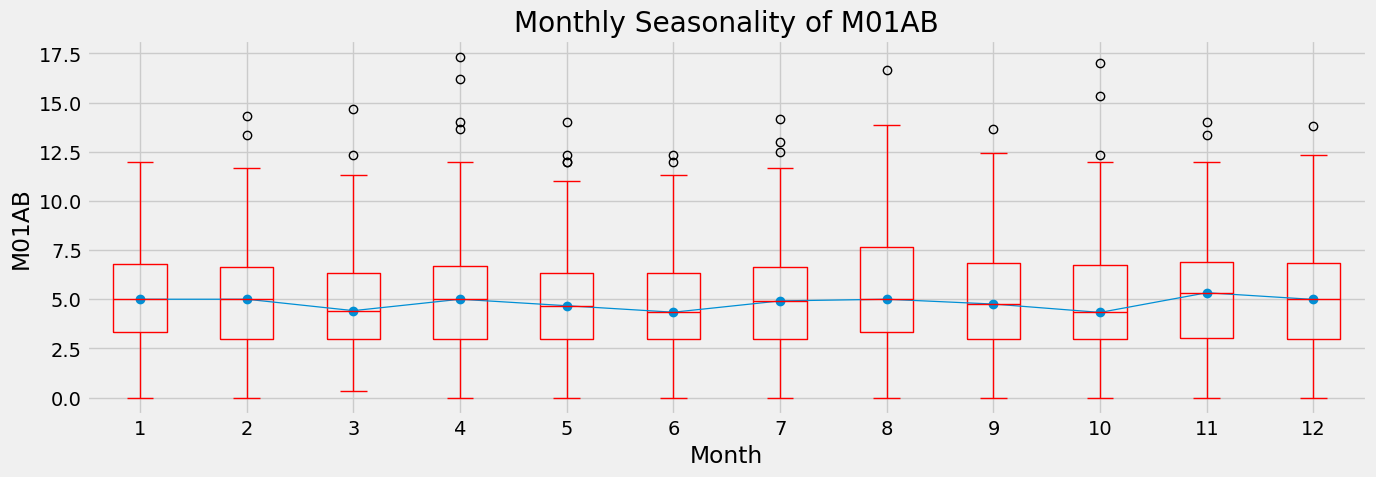

In [12]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
#df1['month'] = df1['ds'].apply(lambda x: x.month)
df.boxplot(column="y", by='Month', ax=ax, color="red")
df.groupby('Month')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('M01AB')
ax.set_title('Monthly Seasonality of M01AB')
fig.suptitle('');
#plt.savefig("Gráfico de Barra-mes")

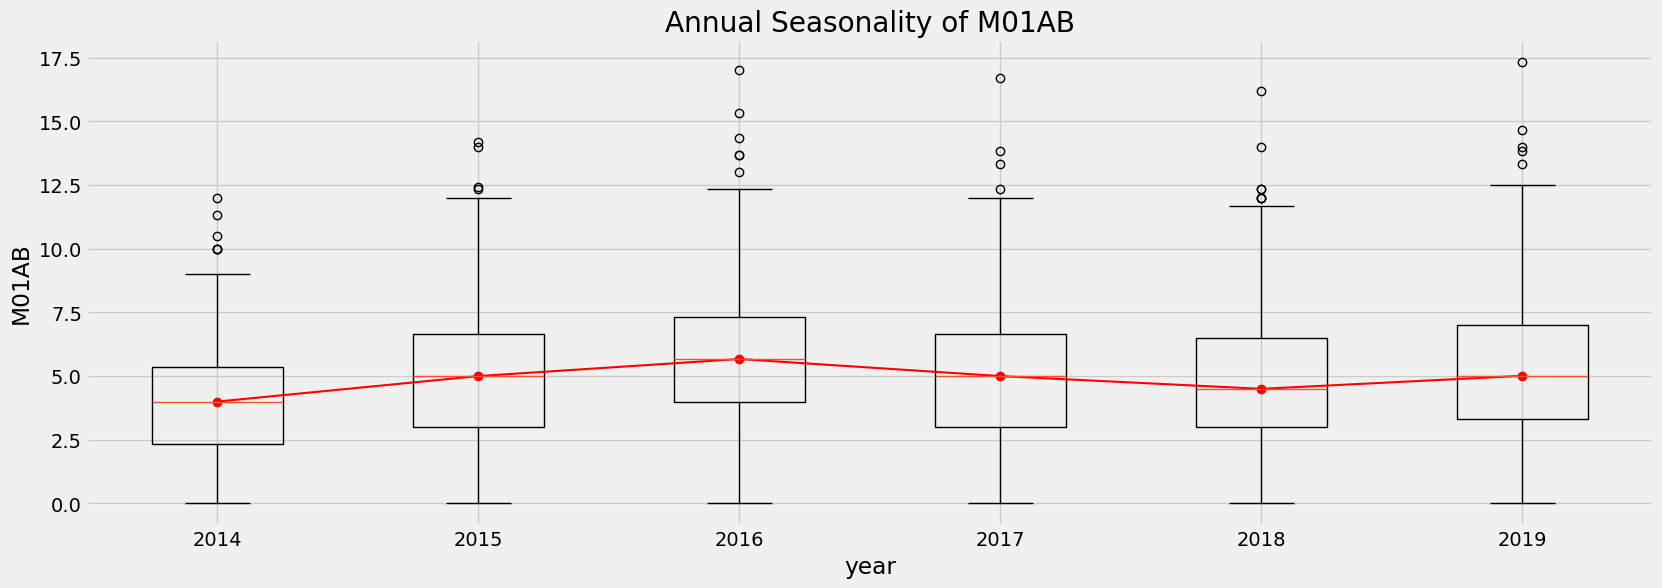

In [13]:
# Boxplot graph for annual seasonality
# ==============================================================================
# Extract year component from date
#df1['year'] = df['ds'].dt.year

# Create a dictionary to store the data for each year
data_anual = {}
for year in df['Year'].unique():
    data_anual[year] = df.loc[df['Year'] == year, 'y'].values

# Create a data list for the Boxplot chart
boxplot_data = [data_anual[year] for year in sorted(data_anual.keys())]

# Create the Boxplot chart
plt.figure(figsize=(18, 6))
plt.boxplot(boxplot_data, labels=sorted(data_anual.keys()))
plt.xlabel('year')
plt.ylabel('M01AB')
plt.title('Annual Seasonality of M01AB')

# Add the median line graph
medians = [np.median(data_anual[year]) for year in sorted(data_anual.keys())]
plt.plot(range(1, len(medians) + 1), medians, marker='o', color='red', linestyle='-')

plt.show()

## **Autocorrelation Plot**

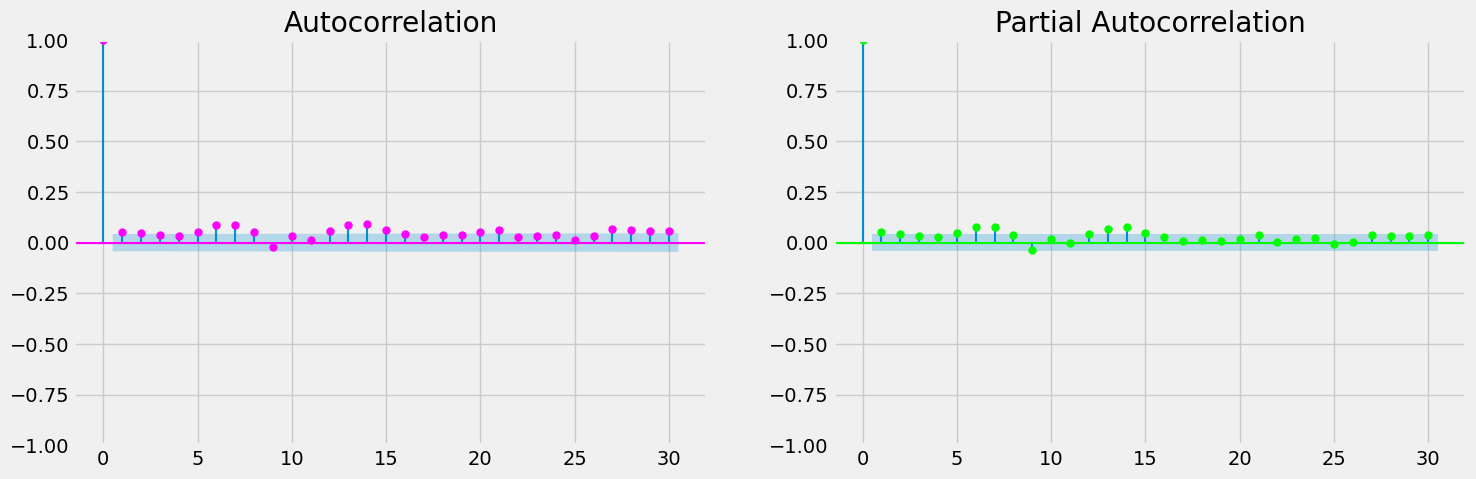

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')
plt.show()

# **Split the data into training and testing** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 days.

In [15]:
data=df[["ds","y","unique_id"]]
data

,ds,y,unique_id
0,2014-01-02,0.00,1
1,2014-01-03,8.00,1
2,2014-01-04,2.00,1
3,2014-01-05,4.00,1
4,2014-01-06,5.00,1
...,...,...,...
2101,2019-10-04,7.34,1
2102,2019-10-05,3.84,1
2103,2019-10-06,4.00,1
2104,2019-10-07,7.34,1


In [16]:
train = data[data.ds<='2019-09-08'] 
test=data[(data['ds'] > '2019-09-08')]

train.shape, test.shape

((2076, 3), (30, 3))

# **Implementation with StatsForecast** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

We are going to train the `Multiple Seasonal Trend (MSTL)` model, using the `MSTL` function. This model will help us forecast user demand in the next 30 days.

In [75]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA

In [76]:
season_length = 7 # daily data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
# Create a list of models and instantiation parameters

models = [MSTL(
    season_length=[7,365], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)]

In [77]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='D', 
    n_jobs=-1)

## **Fit the Model**

In [78]:
sf.fit()

StatsForecast(models=[MSTL])

## **Predict Method**
We will use the predict method to forecast the last 30 days for the demand for a drug MO1AB. This method only has one parameter, the forecast horizon.

In [79]:
Y_hat = sf.predict(horizon)
Y_hat

,ds,MSTL
unique_id,,
1,2019-09-09,3.023909
1,2019-09-10,8.529580
1,2019-09-11,3.611073
1,2019-09-12,6.426287
1,2019-09-13,3.862032
1,2019-09-14,10.995332
1,2019-09-15,4.156257
1,2019-09-16,2.832493
1,2019-09-17,5.727351


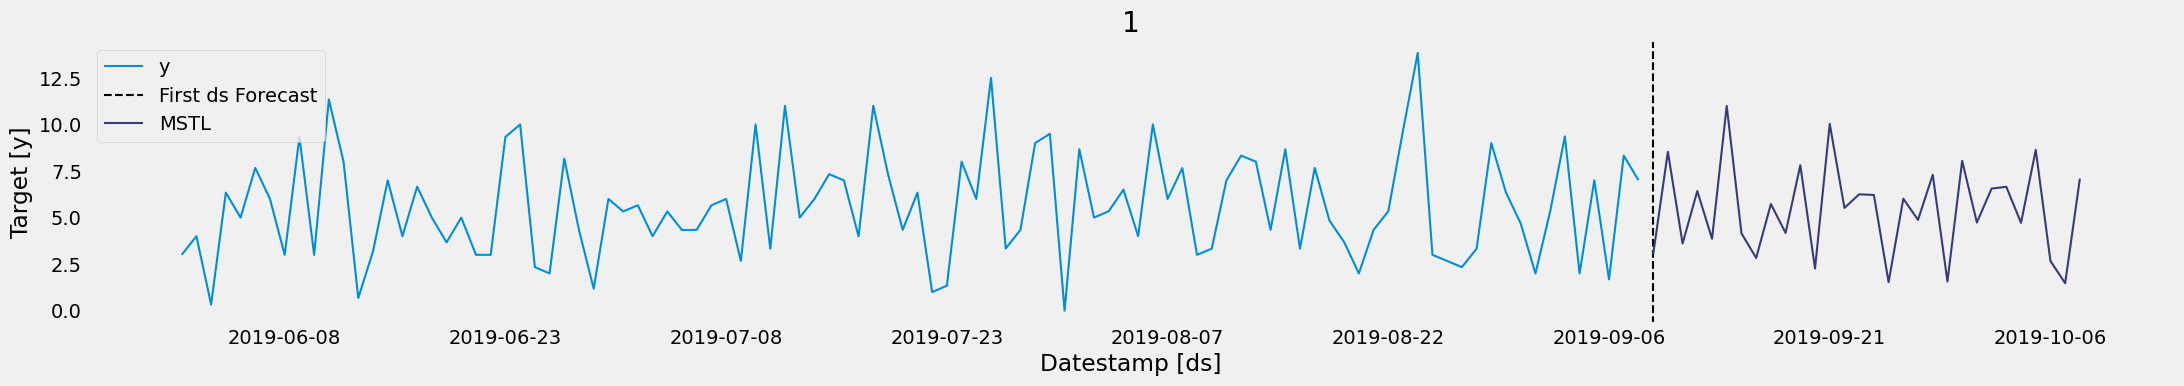

In [80]:
sf.plot(train, Y_hat, max_insample_length=100)

# **Evaluate the model** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

We are going to evaluate the performance of our MSTL model for the forecast data of the sales volume demand of M01AB, for this we are going to build a function where we can have different types of metrics.

In [81]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [82]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [83]:
evaluate_performace(train, test,Y_hat.reset_index() , models=["MSTL"])

,mae,mape,mase,rmse,smape
MSTL,2.618794,127.940391,0.873116,3.342642,56.06224


# **Conclusion** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)

According to the results provided for the drug demand forecast, using the MSTL (Multiple Seasonal and Trend Decomposition using Loess) model, the following evaluation metrics were obtained:

In [84]:
evaluate_performace(train, test,Y_hat.reset_index() , models=["MSTL"])

,mae,mape,mase,rmse,smape
MSTL,2.618794,127.940391,0.873116,3.342642,56.06224


These metrics give us information about the accuracy of the forecast made by the MSTL model. Below we present some conclusions based on these results:

1. MAE (Mean Absolute Error): The MAE value indicates the average of the absolute errors between forecasts and actual demand values. In this case, a value of 2.618794 was obtained, which indicates that, on average, the forecasts differ from the actual values by approximately 2.62 units of demand for the drug. The smaller the MAE value, the higher the accuracy of the model.


4. RMSE (Mean Squared Error): The RMSE value represents the square root of the average of the squared errors between the forecasts and the actual values of demand. In this case, a value of 3.342642 was obtained, indicating that the root mean square difference between the forecasts and actual values is approximately 3.34 units of drug demand. The lower the RMSE value, the higher the accuracy of the model.


Overall, the results indicate that the MSTL model used for drug demand forecasting has moderate accuracy. However, it is important to consider the specific context of the pharmaceutical industry and the nature of the data used for forecasting. It may be necessary to make additional adjustments to the model or explore other time series forecasting techniques to improve the accuracy of the predictions.

# **References** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#multiple-seasonalities).
5. [Model MTSL](https://nixtla.github.io/statsforecast/docs/models/multipleseasonaltrend.html)
6. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
7. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
8. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).